In [349]:
from astrodbkit import astrodb 
import matplotlib.pyplot as plt
import pandas as pd

In [350]:
db = astrodb.Database("bdnycdev1.db")

Database ready for use


In [351]:
db.info()


Database path: bdnycdev1.db 
SQL path: bdnycdev1.sql

Database Inventory
SOURCES: 1938
CHANGELOG: 205
DATA_REQUESTS: 27
IGNORE: 122
INSTRUMENTS: 54
MODES: 7
PARALLAXES: 436
PHOTOMETRY: 10358
PROPER_MOTIONS: 599
PUBLICATIONS: 607
RADIAL_VELOCITIES: 143
SPECTRA: 3614
SPECTRAL_TYPES: 1511
SYSTEMS: 15
TELESCOPES: 38
VERSIONS: 2


In [352]:
db.help()


The astrodb.Database class, hereafter db, provides a variety of methods to interact with a SQLite database file.
Docstrings are available for all methods and can be accessed in the usual manner; eg, help(db.query).
We list a few key methods below.

    Methods to explore the database:
    * db.query() - send SELECT commands to the database. Returns results in a variety of formats
    * db.info() - get a quick summary of the contents of the database
    * db.schema() - quickly examine the columns, types, etc of a specified table
    * db.search() - search through a table to find entries matching the criteria
    * db.inventory() - search for all entries that match the specified source_id
    * db.references() - search for all entries in all tables matching the criteria. Useful for publications

    Methods to modify the database:
    * db.add_data() - add data to an existing table, either by providing a file or by providing the data itself
    * db.table() - create or modify tables in 

In [353]:
db.query()

TypeError: query() missing 1 required positional argument: 'SQL'

In [354]:
help(db.query)

Help on method query in module astrodbkit.astrodb:

query(SQL, params='', fmt='array', fetch='all', unpack=False, export='', verbose=False, use_converters=True) method of astrodbkit.astrodb.Database instance
    Returns data satisfying the provided **SQL** script. Only SELECT or PRAGMA statements are allowed.
    Results can be returned in a variety of formats.
    For example, to extract the ra and dec of all entries in SOURCES in astropy.Table format one can write:
        data = db.query('SELECT ra, dec FROM sources', fmt='table')
    
    For more general SQL statements, see the modify() method.
    
    Parameters
    ----------
    SQL: str
        The SQL query to execute
    params: sequence
        Mimics the native parameter substitution of sqlite3
    fmt: str
        Returns the data as a dictionary, array, astropy.table, or pandas.Dataframe
        given 'dict', 'array', 'table', or 'pandas'
    fetch: str
        String indicating whether to return **all** results or just

In [355]:
db.query("SELECT * FROM sources LIMIT 5", fmt = "pandas")

,comments,companions,components,dec,designation,id,names,publication_shortname,ra,shortname,unum,version
0,,None,None,18.333275,SDSS J16585026+1820006,1,SDSS J16585026+1820006,West08,254.709737,1658+1820,U51440,2.0
1,,None,None,-1.280556,2MASS J13314894-0116500,2,"SDSS J133148.92-011651.4, 2MASS J13314894-0116500",Hawl02,202.953870,1331-0116,U50174,2.0
2,None,None,"1619,1620",-4.105361,2MASS J23310161-0406193,3,2MASS J23310161-0406193,Gizi00,352.756710,2331-0406,U12191,2.0
3,None,None,None,10.533056,2MASS J14482563+1031590,4,"2MASS J14482563+1031590, 2MASSW J1448256+10315...",Wils03b,222.106791,1448+1031,U20587,1.0
4,None,None,None,3.281762,2MASS J14432796+0316543,5,LSPM J1443+0316,LSPM-N,220.866530,1443+0316,U20585,2.0


In [356]:
NIR_spectraltype = db.query("select sources.id as source_id, shortname, spectral_type, ra, dec from sources join spectral_types on sources.id=spectral_types.source_id where regime='NIR' order by source_id", fmt="pandas")

In [357]:
NIR_spectraltype

,dec,ra,shortname,source_id,spectral_type
0,-4.105361,352.756710,2331-0406,3,8.0
1,-37.628833,15.712500,0102-3737,107,8.0
2,-11.012096,358.021136,2352-1100,146,8.0
3,5.150606,289.240092,1916+0508,300,8.0
4,20.728167,231.558541,1526+2043,353,15.0
5,16.204361,118.099580,0752+1612,358,6.0
6,-2.997467,351.483520,2325-0259,384,13.0
7,-10.239046,148.338620,0953-1014,415,7.5
8,-13.441167,350.302250,2321-1326,433,11.0
9,0.920476,356.412659,2345+0055,525,9.0


In [358]:
IR_spectraltype = db.query("select sources.id as source_id, shortname, spectral_type, ra, dec from sources join spectral_types on sources.id=spectral_types.source_id where regime='IR' order by source_id", fmt="pandas")
OPT_spectraltype = db.query("select sources.id as source_id, shortname, spectral_type, ra, dec from sources join spectral_types on sources.id=spectral_types.source_id where regime='OPT' order by source_id", fmt="pandas")



In [359]:
len(IR_spectraltype)


503

In [360]:
len(OPT_spectraltype)

483

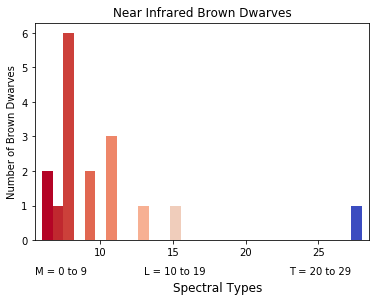

In [361]:
plt.title("Near Infrared Brown Dwarves")
plt.ylabel("Number of Brown Dwarves")
plt.xlim(5.5, 28.5)
plt.ylim(0, 6.3)
plt.annotate("M = 0 to 9", xy = (6.5, 4.5), xytext = (5.5,-1))
plt.annotate("L = 10 to 19", xy = (6.5, 4.5), xytext = (13,-1))
plt.annotate("T = 20 to 29", xy = (6.5, 4.5), xytext = (23,-1))
plt.annotate("Spectral Types", xy = (6.5, 4.5), xytext = (15,-1.5), size = 12)
cm = plt.cm.get_cmap('coolwarm_r')


n, bins, patches = plt.hist(NIR_spectraltype["spectral_type"], 30)
bin_centers = 0.5 * (bins[:-1] + bins[1:])


col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))
plt.savefig("N")
plt.show()

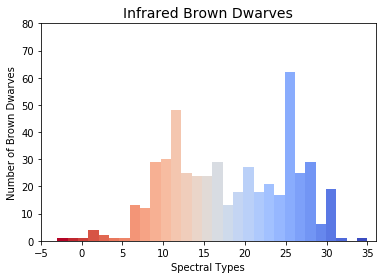

In [362]:

plt.title("Infrared Brown Dwarves", size = 14)
plt.ylabel("Number of Brown Dwarves")
plt.xlabel("Spectral Types")
plt.xlim(-5,36)
plt.ylim(0,80)
cm = plt.cm.get_cmap('coolwarm_r')


n, bins, patches = plt.hist(nIR_spectraltype, 30)
bin_centers = 0.5 * (bins[:-1] + bins[1:])


col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))
plt.savefig("Absolute_Magnitude_of_Coma_Ber")
plt.show()

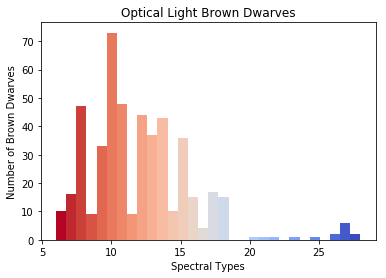

In [363]:

plt.title("Optical Light Brown Dwarves")
plt.ylabel("Number of Brown Dwarves")
plt.xlabel("Spectral Types")

cm = plt.cm.get_cmap('coolwarm_r')


n, bins, patches = plt.hist(nOPT_spectraltype, 30)
bin_centers = 0.5 * (bins[:-1] + bins[1:])


col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))
plt.savefig("Absolute_Magnitude_of_Coma_Ber")
plt.show()

In [364]:
NIR_spectraltype

,dec,ra,shortname,source_id,spectral_type
0,-4.105361,352.756710,2331-0406,3,8.0
1,-37.628833,15.712500,0102-3737,107,8.0
2,-11.012096,358.021136,2352-1100,146,8.0
3,5.150606,289.240092,1916+0508,300,8.0
4,20.728167,231.558541,1526+2043,353,15.0
5,16.204361,118.099580,0752+1612,358,6.0
6,-2.997467,351.483520,2325-0259,384,13.0
7,-10.239046,148.338620,0953-1014,415,7.5
8,-13.441167,350.302250,2321-1326,433,11.0
9,0.920476,356.412659,2345+0055,525,9.0


In [365]:
nIR_spectraltype = []
for i in IR_spectraltype['spectral_type']:
    try:
        nIR_spectraltype.append(float(i))
    except ValueError:
        print(" nothing here")

        

 nothing here


In [366]:
len(nIR_spectraltype)

502

In [367]:
nOPT_spectraltype = []
for i in OPT_spectraltype['spectral_type']:
    try:
        nOPT_spectraltype.append(float(i))
    except ValueError:
        print(" nothing here")


 nothing here
 nothing here


In [368]:
len(nOPT_spectraltype)

481

In [369]:
len(OPT_spectraltype)

483

In [370]:
type(IR_spectraltype["spectral_type"])

pandas.core.series.Series

In [371]:
NIR_spectraltype["spectral_type"]

0      8.0
1      8.0
2      8.0
3      8.0
4     15.0
5      6.0
6     13.0
7      7.5
8     11.0
9      9.0
10     9.5
11     6.0
12    11.0
13     7.5
14     7.0
15    28.0
16    11.0
Name: spectral_type, dtype: float64

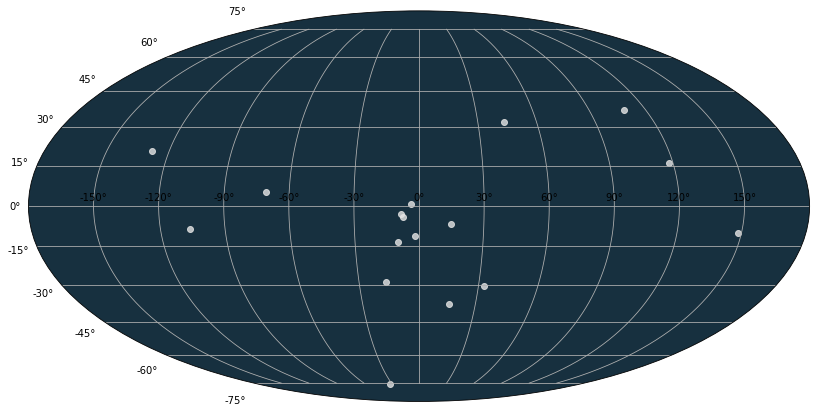

In [372]:

import astropy.coordinates as coord
import astropy.units as u
import numpy as np
# ===============================================
# Plotting coordinates
# ===============================================
# converting BDNYC database coordinates for plot
NIR_ra = coord.Angle(pd.to_numeric(NIR_spectraltype['ra']).fillna(np.nan).values*u.degree)
NIR_ra = NIR_ra.wrap_at(180*u.degree)
NIR_dec= coord.Angle(pd.to_numeric(NIR_spectraltype['dec']).fillna(np.nan).values*u.degree)
fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(111, projection="mollweide")
ax.set_facecolor('#17303F')
plt.grid(True)
ax.scatter(NIR_ra.radian, NIR_dec.radian, color="#E5E5E5", alpha=.8, edgecolors='face', label='in BDNYC database')
#ax.scatter(matches_ra.radian, matches_dec.radian, color="#F24333", label='in BDNYC database and GAIA dataset')
#ax.scatter(new_objects_ra.radian, new_objects_dec.radian, color="#E3B505", label='in GAIA dataset')
# ax.legend(loc=4)

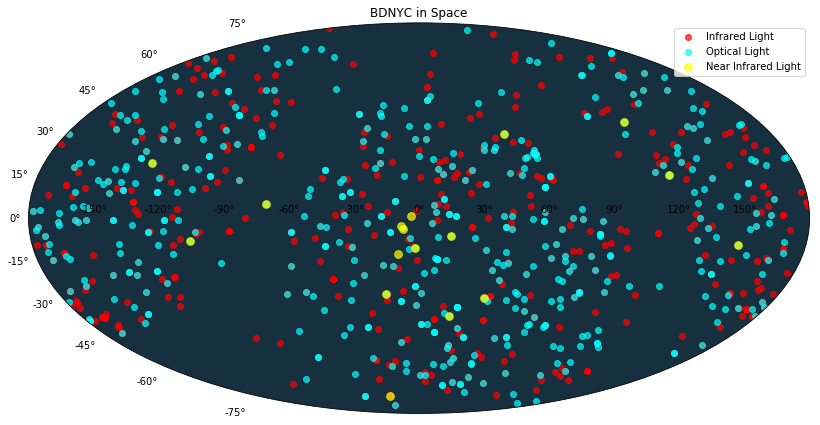

In [381]:
NIR_ra = coord.Angle(pd.to_numeric(NIR_spectraltype['ra']).fillna(np.nan).values*u.degree)
NIR_ra = NIR_ra.wrap_at(180*u.degree)
NIR_dec= coord.Angle(pd.to_numeric(NIR_spectraltype['dec']).fillna(np.nan).values*u.degree)
fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(111, projection="mollweide")
ax.set_facecolor('#17303F')


IR_ra = coord.Angle(pd.to_numeric(IR_spectraltype['ra']).fillna(np.nan).values*u.degree)
IR_ra = IR_ra.wrap_at(180*u.degree)
IR_dec= coord.Angle(pd.to_numeric(IR_spectraltype['dec']).fillna(np.nan).values*u.degree)



OPT_ra = coord.Angle(pd.to_numeric(OPT_spectraltype['ra']).fillna(np.nan).values*u.degree)
OPT_ra = OPT_ra.wrap_at(180*u.degree)
OPT_dec= coord.Angle(pd.to_numeric(OPT_spectraltype['dec']).fillna(np.nan).values*u.degree)


ax.scatter(IR_ra.radian, IR_dec.radian, color="red", alpha = .7, edgecolors='face', label='Infrared Light')
ax.scatter(OPT_ra.radian, OPT_dec.radian, color="aqua", alpha=.7, edgecolors='face', label='Optical Light')
ax.scatter(NIR_ra.radian, NIR_dec.radian, color="yellow", alpha=.7, edgecolors='face', label='Near Infrared Light', s = 60)
plt.title("BDNYC in Space")
plt.legend()


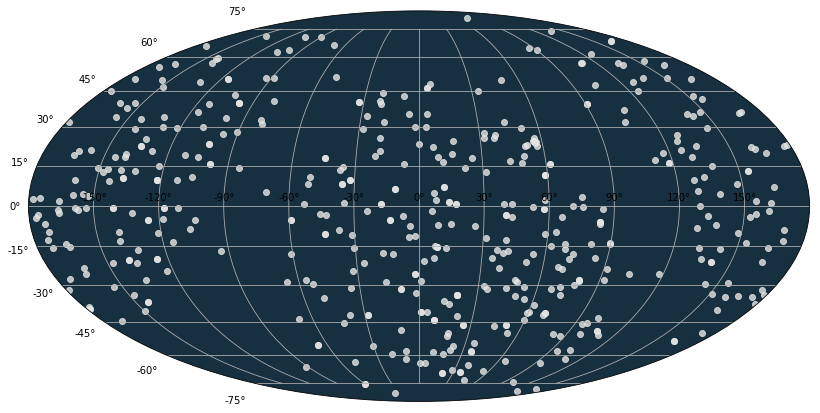

In [374]:
OPT_ra = coord.Angle(pd.to_numeric(OPT_spectraltype['ra']).fillna(np.nan).values*u.degree)
OPT_ra = OPT_ra.wrap_at(180*u.degree)
OPT_dec= coord.Angle(pd.to_numeric(OPT_spectraltype['dec']).fillna(np.nan).values*u.degree)
fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(111, projection="mollweide")
ax.set_facecolor('#17303F')
plt.grid(True)
ax.scatter(OPT_ra.radian, OPT_dec.radian, color="#E5E5E5", alpha=.8, edgecolors='face', label='in BDNYC database')